In [155]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score

In [156]:
data = pd.read_csv("data.csv")

In [157]:
data.head(10)

Length      Width  Thickness  Working Width     Epoch
0  14.418594   4.492233   6.228045       2.746836  4.573289
1   6.416955  10.661753   4.346087       3.949203  2.676545
2   6.583058  12.082281   4.472702       3.142853  8.083503
3  14.280348   5.111007   5.646974       3.025639  5.414505
4  15.121059   1.927749   2.046204       2.423817  7.614661
5   5.404853   4.228419   2.033189       1.528347  5.691051
6  15.568509   8.344746   9.092434       2.329226  5.109392
7  11.139750   4.461628   4.831434       2.404214  2.264130
8   6.960213   6.638441   2.116817       0.342207  4.502793
9  16.108227   1.897144   1.799735       2.363544  9.345614

In [158]:
data.shape

(500, 5)

In [159]:
data.describe()

Length       Width   Thickness  Working Width       Epoch
count  500.000000  500.000000  500.000000     500.000000  500.000000
mean    10.785831    5.905237    3.093546       2.666898    5.753872
std      3.960396    3.017368    2.120724       1.168797    2.411055
min      4.062280    1.765692    0.690370       0.116673    1.017801
25%      6.948882    3.724303    1.627517       2.008470    4.031310
50%     11.269112    5.464779    2.069157       2.465055    5.711660
75%     14.171209    8.320455    4.837683       3.804134    7.341509
max     20.474997   13.392292    9.272603       5.288019   13.983360

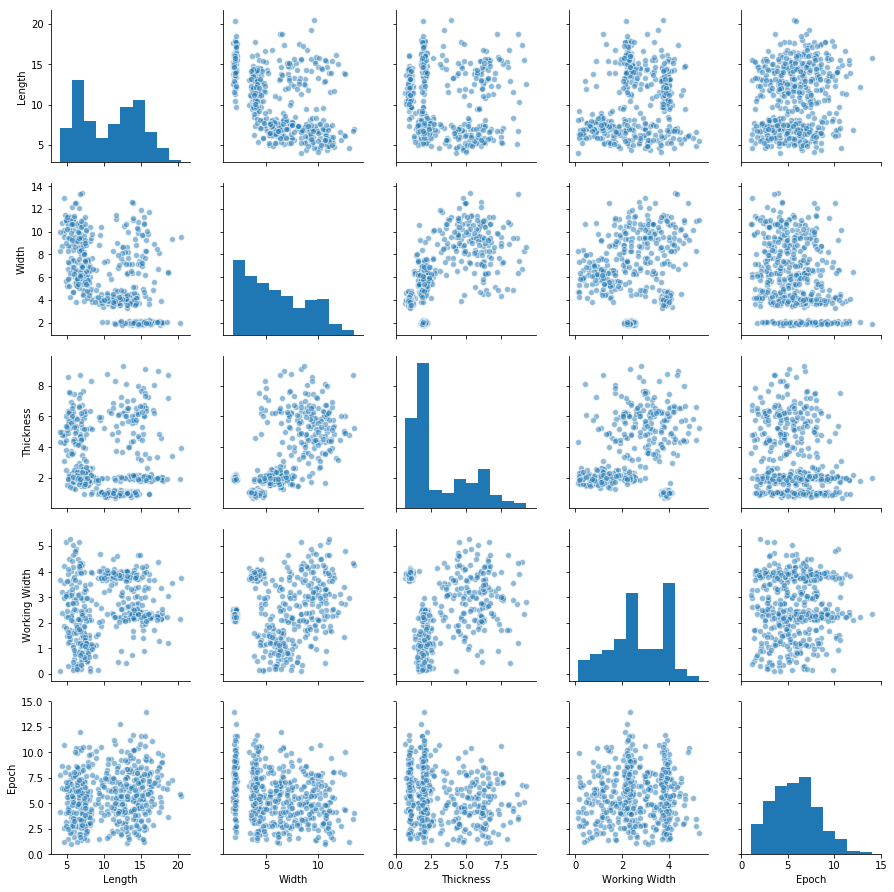

In [160]:
import seaborn as sns
sns.pairplot(data,plot_kws={'alpha':0.5})
plt.show()

In [161]:
d = {'euclidean': pdist(data, 'euclidean'),
     'cityblock': pdist(data, 'cityblock'),
     'minkowski_6': pdist(data, 'minkowski', p=6),
     'cosine': pdist(data, 'cosine'),
     'chebyshev': pdist(data, 'chebyshev'),
     'canberra': pdist(data, 'canberra')}

In [162]:
D = pd.DataFrame(d)
D.shape

(124750, 6)

In [163]:
D_corr = D.corr().loc[['cityblock', 'euclidean', 'minkowski_6', 'chebyshev', 'canberra', 'cosine'],
                      ['cityblock', 'euclidean', 'minkowski_6', 'chebyshev', 'canberra', 'cosine']
                     ]
D_corr

cityblock  euclidean  minkowski_6  chebyshev  canberra    cosine
cityblock     1.000000   0.965668     0.868297   0.833686  0.868407  0.835299
euclidean     0.965668   1.000000     0.962979   0.939511  0.774670  0.831359
minkowski_6   0.868297   0.962979     1.000000   0.995791  0.646401  0.751104
chebyshev     0.833686   0.939511     0.995791   1.000000  0.611557  0.716179
canberra      0.868407   0.774670     0.646401   0.611557  1.000000  0.704191
cosine        0.835299   0.831359     0.751104   0.716179  0.704191  1.000000

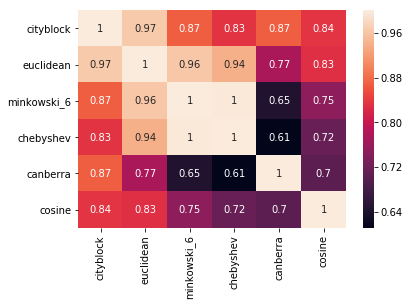

In [164]:
sns.heatmap(D_corr, annot=True)
plt.show()

###### При том, что расстояние Минковского мы не можем использовать, то сильно отличается только canberra и cosine

###### Нормализуем данные для дальнейшей работы

In [165]:
from sklearn import preprocessing

In [166]:
data_normalized = pd.DataFrame(preprocessing.normalize(data, 
                                                        norm="l2"), 
                                columns=data.columns)
data_normalized.head(10)

Length     Width  Thickness  Working Width     Epoch
0  0.839021  0.261404   0.362411       0.159839  0.266121
1  0.457772  0.760586   0.310040       0.281728  0.190939
2  0.390259  0.716266   0.265152       0.186316  0.479209
3  0.823913  0.294883   0.325805       0.174566  0.312393
4  0.872422  0.111223   0.118057       0.139844  0.439334
5  0.582991  0.456096   0.219308       0.164854  0.613861
6  0.754105  0.404201   0.440418       0.112823  0.247488
7  0.834375  0.334179   0.361878       0.180077  0.169585
8  0.642411  0.612713   0.195377       0.031585  0.415597
9  0.849876  0.100094   0.094955       0.124701  0.493078

###### Теперь самое главное -> DBSCAN

In [167]:
from sklearn.cluster import DBSCAN

###### С помощью метрик определим коэффициенты 

In [168]:
EPS=-1
min_smp=-1
Max=-1
j=0.07
step=0.01

for i in range(3,9,1):
        j=0.07
        while(j<0.1):
            cl_dbscan = DBSCAN(eps=j, min_samples=i, metric='euclidean')
            cl_dbscan.fit(data_normalized)
            ME = metrics.calinski_harabaz_score(data_normalized, cl_dbscan.labels_)
            #print(ME)
            #print(i)
            #print(j)
            if ME>Max:
                Max=ME
                EPS=i
                min_smp=j
            j+=step
        
print(Max)
print(EPS)
print(min_smp)

197.573682114
7
0.08


In [169]:
EPS=-1
min_smp=-1
Max=-1
j=0.07
step=0.01

for i in range(3,9,1):
        j=0.07
        while(j<0.1):
            cl_dbscan = DBSCAN(eps=j, min_samples=i, metric='euclidean')
            cl_dbscan.fit(data_normalized)
            ME = metrics.silhouette_score(data_normalized, cl_dbscan.labels_)
            #print(ME)
            #print(i)
            #print(j)
            if ME>Max:
                Max=ME
                EPS=i
                min_smp=j
            j+=step
        
print(Max)
print(EPS)
print(min_smp)

0.241012058932
5
0.09999999999999999


###### Тк предыдущие вычисления показали число кластеров около 5-6, то будем продолжать в этом же направлении

In [170]:
cl_dbscan = DBSCAN(eps=0.09, min_samples=5, metric='euclidean')
cl_dbscan.fit(data_normalized)

DBSCAN(algorithm='auto', eps=0.09, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [171]:
np.shape(cl_dbscan.labels_)


(500,)

In [172]:
data['points'] = 'Reachable'
data.iloc[cl_dbscan.core_sample_indices_, 5] = 'Core'
data.loc[cl_dbscan.labels_ == -1, 'points'] = 'Outlier'

###### Посмотрим на то, как распределились объекты на корневые, пограничные и выбросы.

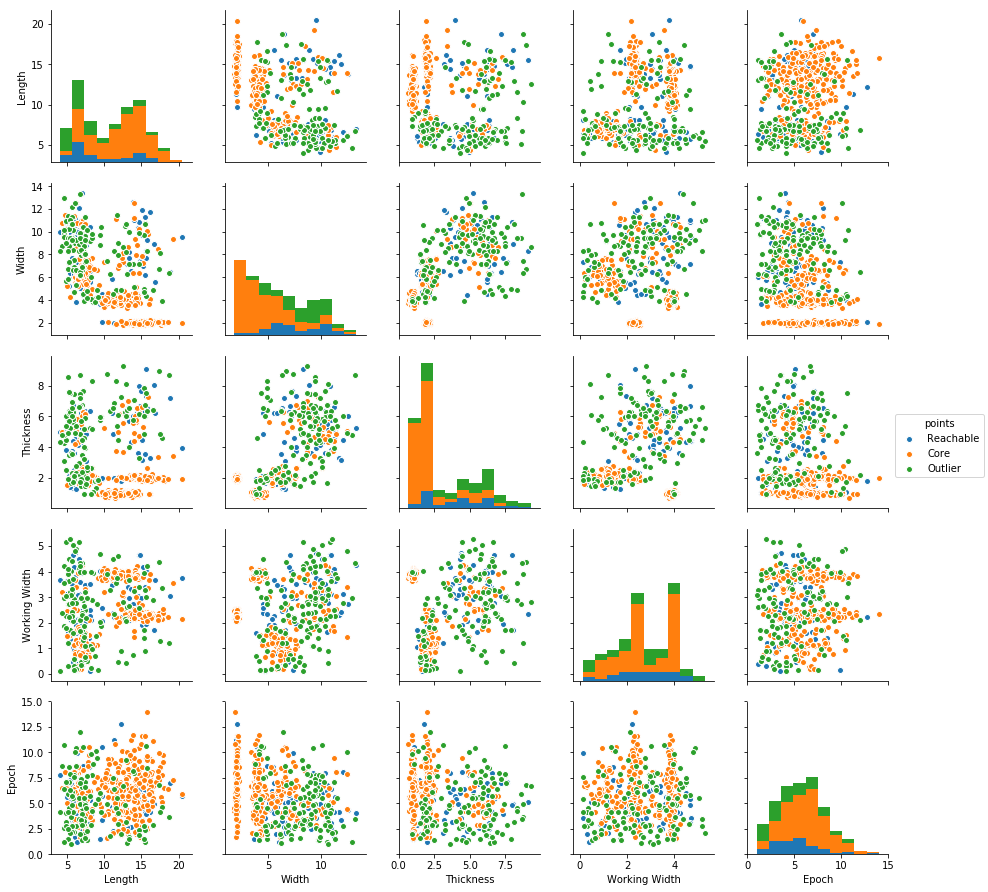

In [173]:
sns.pairplot(hue='points',
             data=data, 
             )
plt.show()

In [174]:
pd.Series(cl_dbscan.labels_).value_counts()

-1     122
 5     107
 2      97
 3      62
 8      30
 0      22
 7      18
 9      12
 6      12
 4       8
 10      5
 1       5
dtype: int64

###### Посмотрим на сколько кластеров разбились наши данные. На 11, неплохо

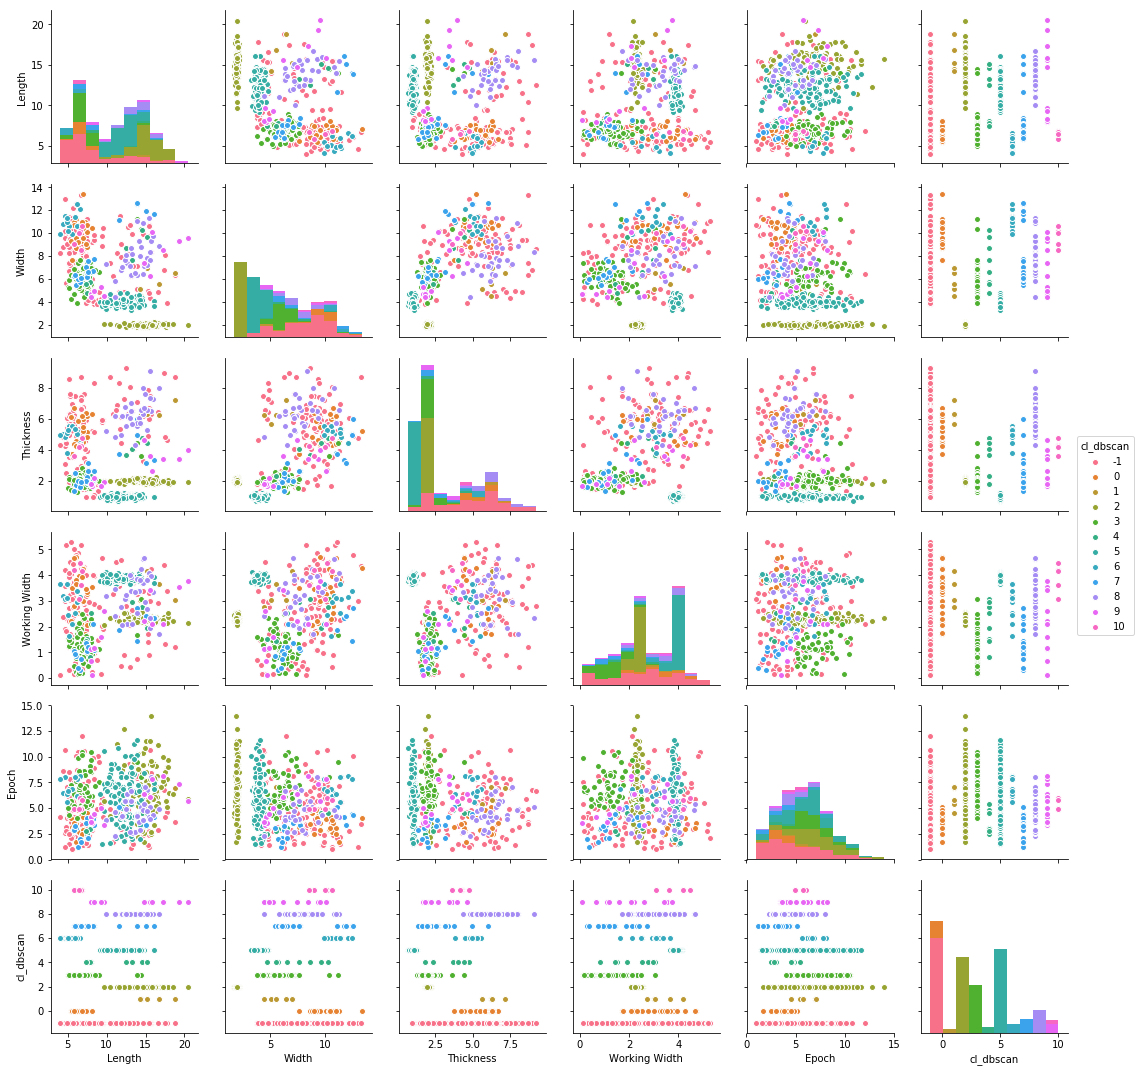

In [175]:
data['cl_dbscan'] = cl_dbscan.labels_

sns.pairplot(
             hue='cl_dbscan',
             data=data, 
             )
plt.show()

###### А по второй метрике вообще на 3, совсем не то, что нам было нужно, да к тому же очень много выбросов

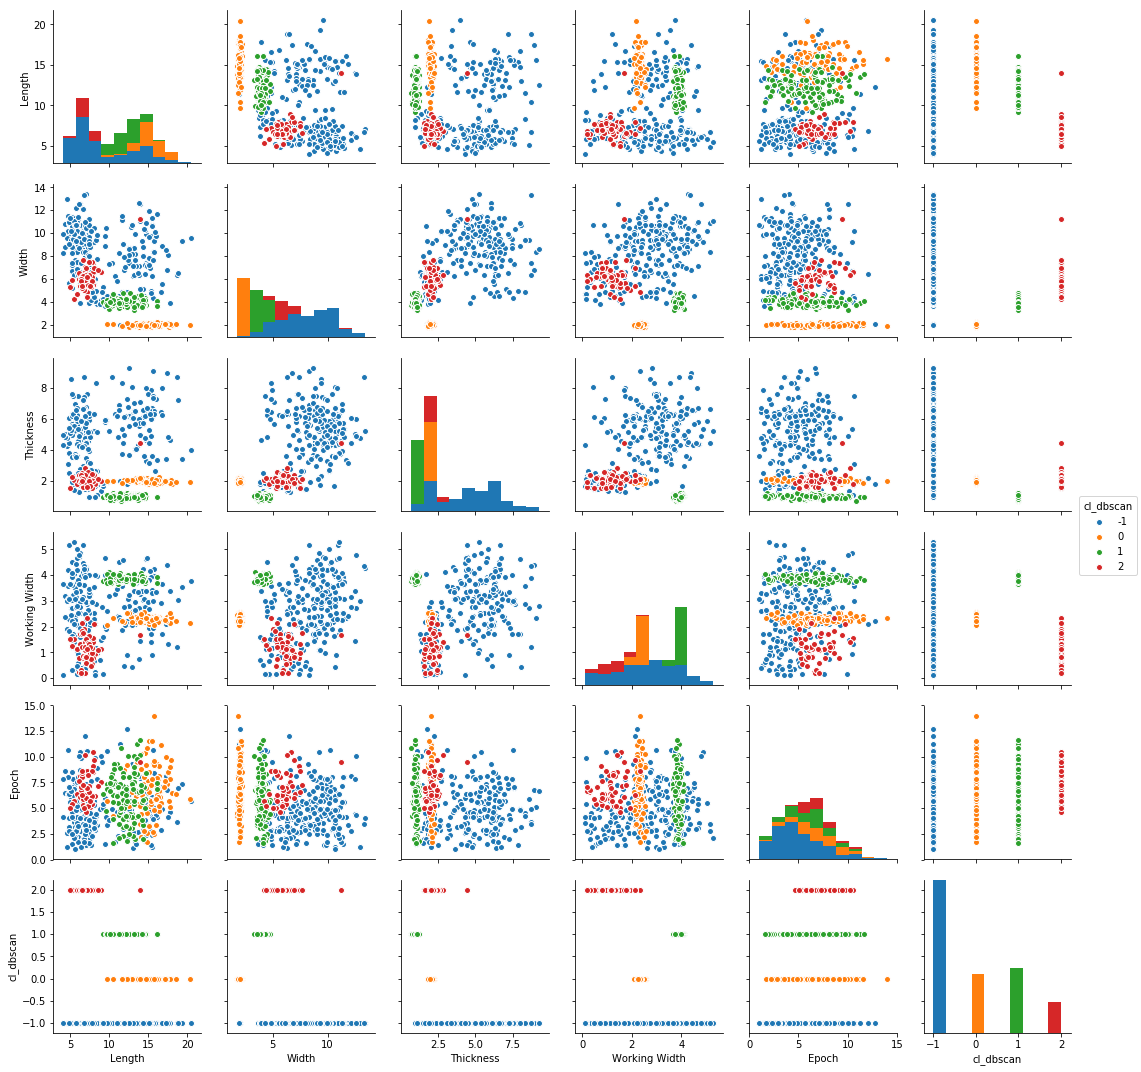

In [176]:
cl_dbscan = DBSCAN(eps=0.08, min_samples=7, metric='euclidean')
cl_dbscan.fit(data_normalized)
data['points'] = 'Reachable'
data.iloc[cl_dbscan.core_sample_indices_, 5] = 'Core'
data.loc[cl_dbscan.labels_ == -1, 'points'] = 'Outlier'
data['cl_dbscan'] = cl_dbscan.labels_

sns.pairplot(
             hue='cl_dbscan',
             data=data, 
             )
plt.show()

###### Посмотрим как изменятся кластеры если менять расстояния. Canberra отличается ото всех. С нее и начнем

In [177]:
EPS=-1
min_smp=-1
Max=-1
j=0.01
step=0.01

for i in range(3,9,1):
        j=0.09
        while(j<0.19):
            cl_dbscan = DBSCAN(eps=j, min_samples=i, metric='canberra')
            cl_dbscan.fit(data_normalized)
            ME = metrics.calinski_harabaz_score(data_normalized, cl_dbscan.labels_)
            #print(ME)
            #print(i)
            #print(j)
            if ME>Max:
                Max=ME
                EPS=i
                min_smp=j
            j+=step
        
print(Max)
print(EPS)
print(min_smp)

157.738840309
6
0.18000000000000002


###### Два кластера и много выбросов

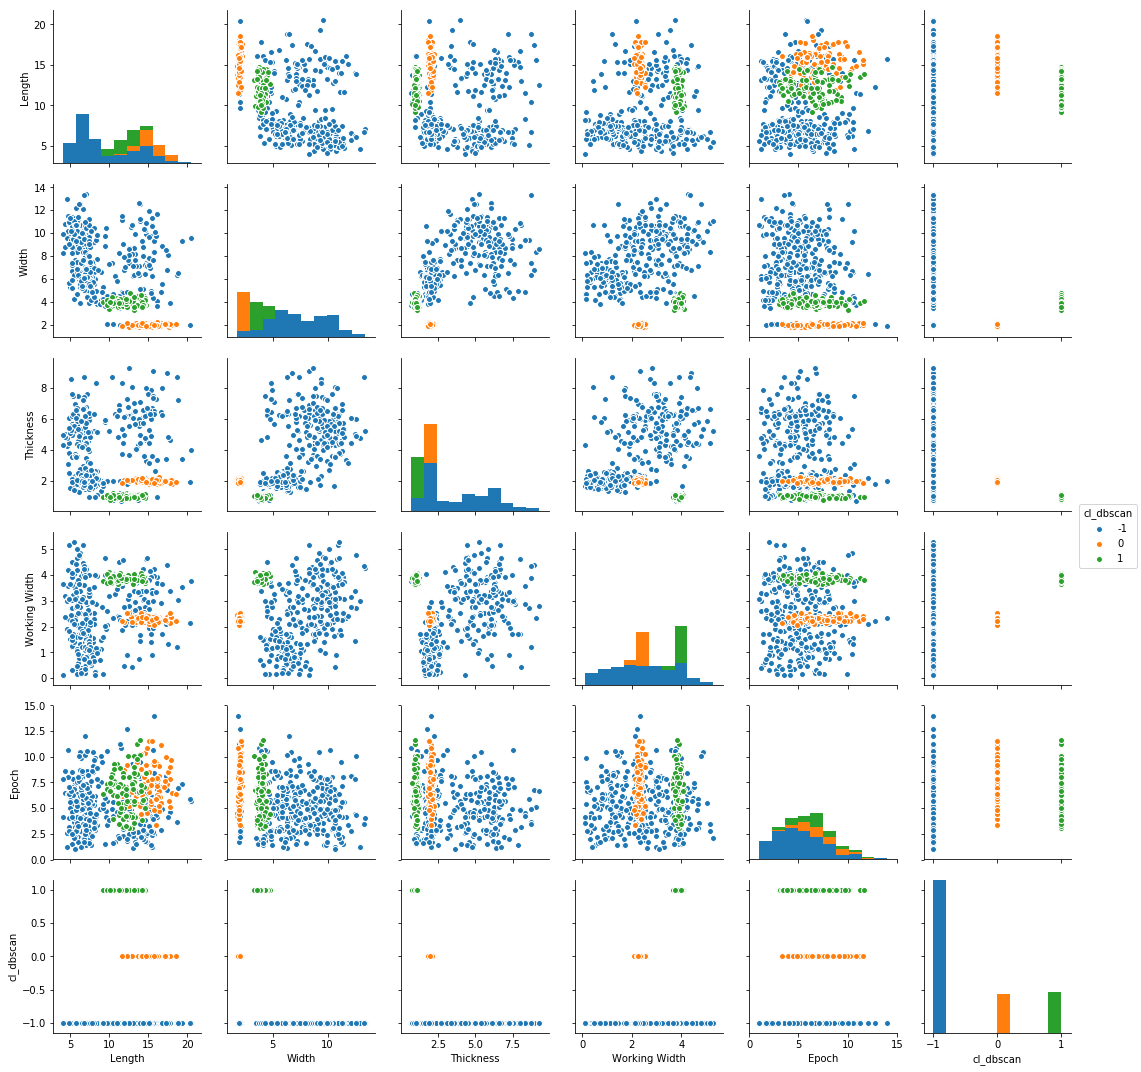

In [178]:
cl_dbscan = DBSCAN(eps=0.18, min_samples=6, metric='canberra')
cl_dbscan.fit(data_normalized)
data['points'] = 'Reachable'
data.iloc[cl_dbscan.core_sample_indices_, 5] = 'Core'
data.loc[cl_dbscan.labels_ == -1, 'points'] = 'Outlier'
data['cl_dbscan'] = cl_dbscan.labels_

sns.pairplot(
             hue='cl_dbscan',
             data=data, 
             )
plt.show()

In [179]:
EPS=-1
min_smp=-1
Max=-1
j=0.09
step=0.01

for i in range(3,9,1):
        j=0.09
        while(j<0.2):
            cl_dbscan = DBSCAN(eps=j, min_samples=i, metric='canberra')
            cl_dbscan.fit(data_normalized)
            ME = metrics.silhouette_score(data_normalized, cl_dbscan.labels_)
            #print(ME)
            #print(i)
            #print(j)
            if ME>Max:
                Max=ME
                EPS=i
                min_smp=j
            j+=step
        
print(Max)
print(EPS)
print(min_smp)

0.241134015264
6
0.19000000000000003


###### Аналогично плохо

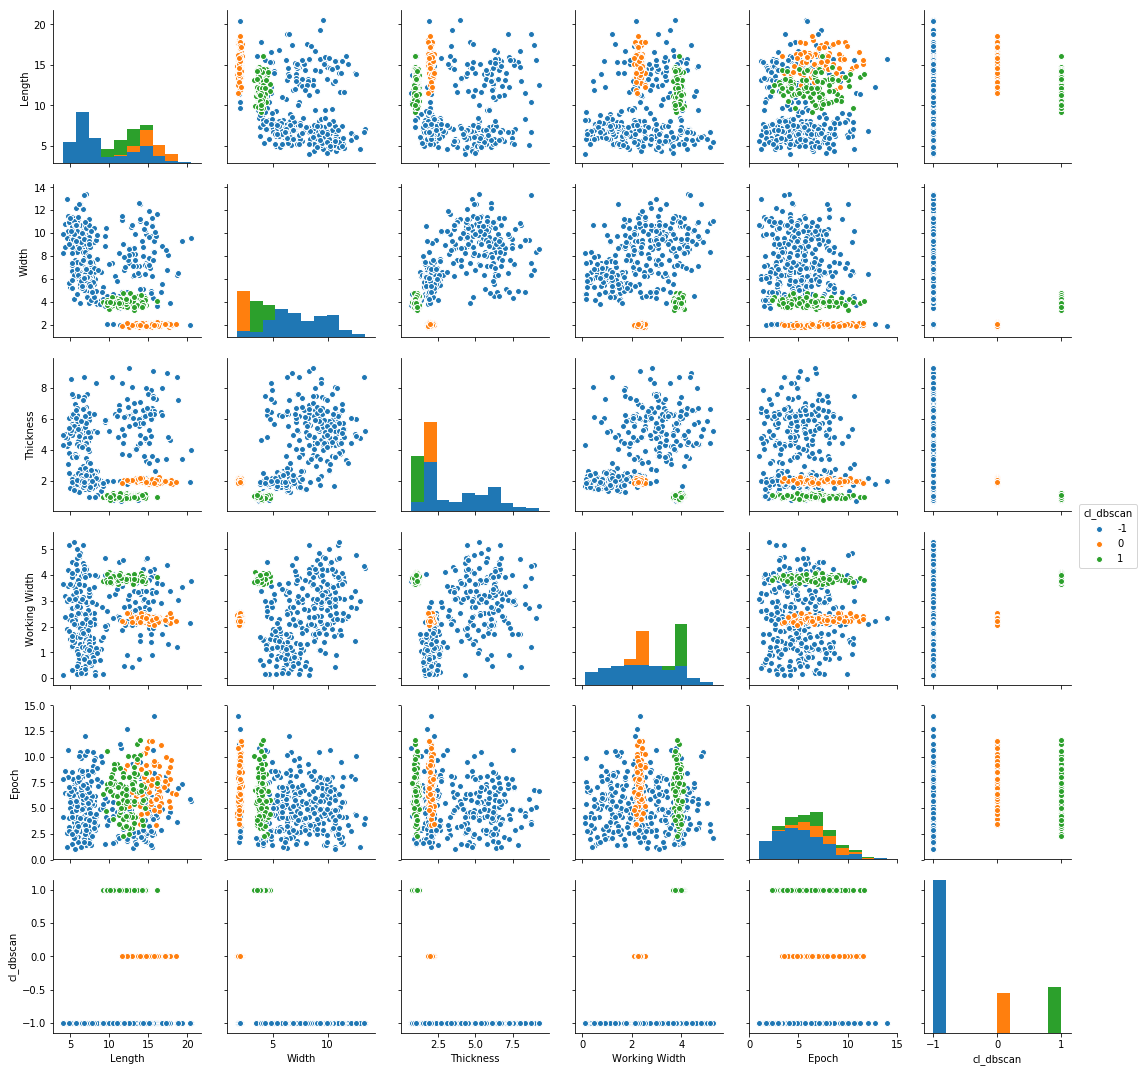

In [180]:
cl_dbscan = DBSCAN(eps=0.19, min_samples=6, metric='canberra')
cl_dbscan.fit(data_normalized)
data['points'] = 'Reachable'
data.iloc[cl_dbscan.core_sample_indices_, 5] = 'Core'
data.loc[cl_dbscan.labels_ == -1, 'points'] = 'Outlier'
data['cl_dbscan'] = cl_dbscan.labels_

sns.pairplot(
             hue='cl_dbscan',
             data=data, 
             )
plt.show()

###### После нескольких попыток подобрать параметры становится понятно, что при данной длинне очень много выбросов, из-за чего не получится кластеризовать данные
###### Попробуем на Чебышеве


In [181]:
EPS=-1
min_smp=-1
Max=-1
j=0.07
step=0.01

for i in range(3,9,1):
        j=0.07
        while(j<0.1):
            cl_dbscan = DBSCAN(eps=j, min_samples=i, metric='chebyshev')
            cl_dbscan.fit(data_normalized)
            ME = metrics.calinski_harabaz_score(data_normalized, cl_dbscan.labels_)
            #print(ME)
            #print(i)
            #print(j)
            if ME>Max:
                Max=ME
                EPS=i
                min_smp=j
            j+=step
        
print(Max)
print(EPS)
print(min_smp)

222.750168054
7
0.08


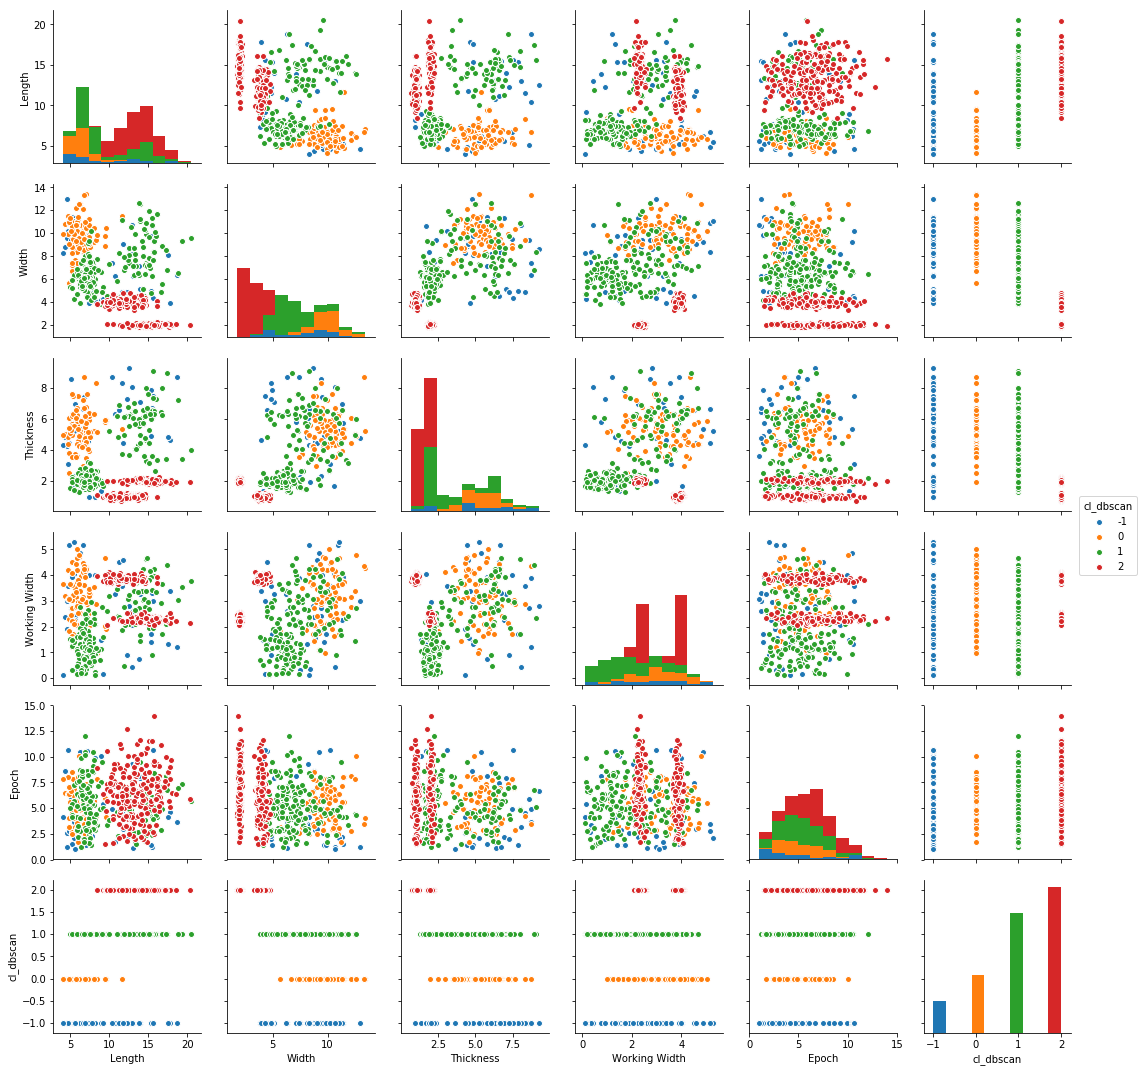

In [182]:
cl_dbscan = DBSCAN(eps=0.08, min_samples=7, metric='chebyshev')
cl_dbscan.fit(data_normalized)
data['points'] = 'Reachable'
data.iloc[cl_dbscan.core_sample_indices_, 5] = 'Core'
data.loc[cl_dbscan.labels_ == -1, 'points'] = 'Outlier'
data['cl_dbscan'] = cl_dbscan.labels_

sns.pairplot(
             hue='cl_dbscan',
             data=data, 
             )
plt.show()

In [183]:
EPS=-1
min_smp=-1
Max=-1
j=0.09
step=0.01

for i in range(3,9,1):
        j=0.09
        while(j<0.11):
            cl_dbscan = DBSCAN(eps=j, min_samples=i, metric='canberra')
            cl_dbscan.fit(data_normalized)
            ME = metrics.silhouette_score(data_normalized, cl_dbscan.labels_)
            #print(ME)
            #print(i)
            #print(j)
            if ME>Max:
                Max=ME
                EPS=i
                min_smp=j
            j+=step
        
print(Max)
print(EPS)
print(min_smp)

0.00968281626956
4
0.10999999999999999


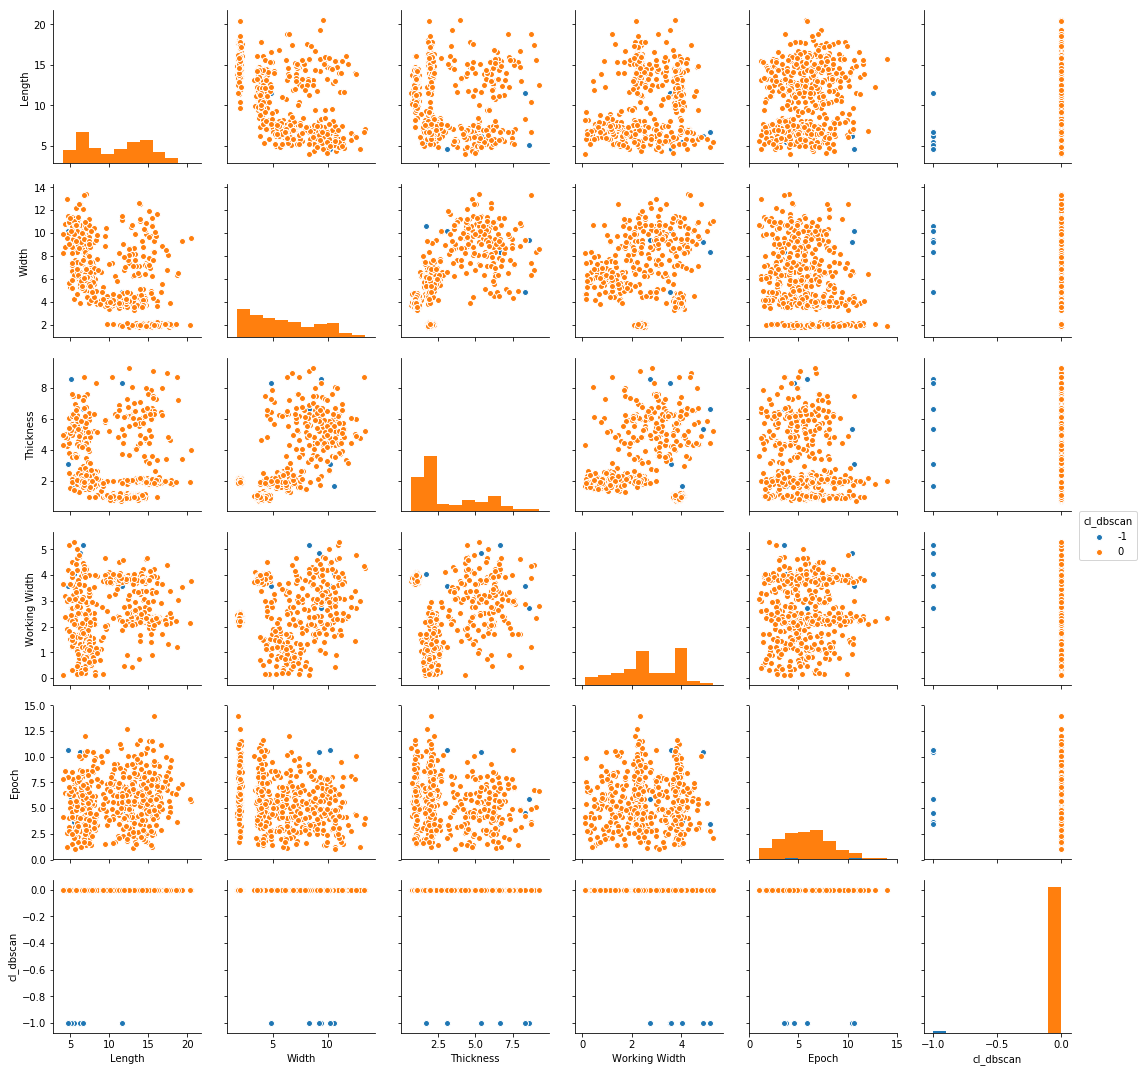

In [184]:
cl_dbscan = DBSCAN(eps=0.1, min_samples=4, metric='chebyshev')
cl_dbscan.fit(data_normalized)
data['points'] = 'Reachable'
data.iloc[cl_dbscan.core_sample_indices_, 5] = 'Core'
data.loc[cl_dbscan.labels_ == -1, 'points'] = 'Outlier'
data['cl_dbscan'] = cl_dbscan.labels_

sns.pairplot(
             hue='cl_dbscan',
             data=data, 
             )
plt.show()

###### Все очень плохо с Чебышевым, поэтому перейдем к кластеризации с расстоянием cosine, причем без эффективности по меткам

In [185]:
%%time
cl_dbscan = DBSCAN(eps=0.0055, min_samples=9, metric='cosine')

cl_dbscan.fit(data_normalized)

Wall time: 7.52 ms


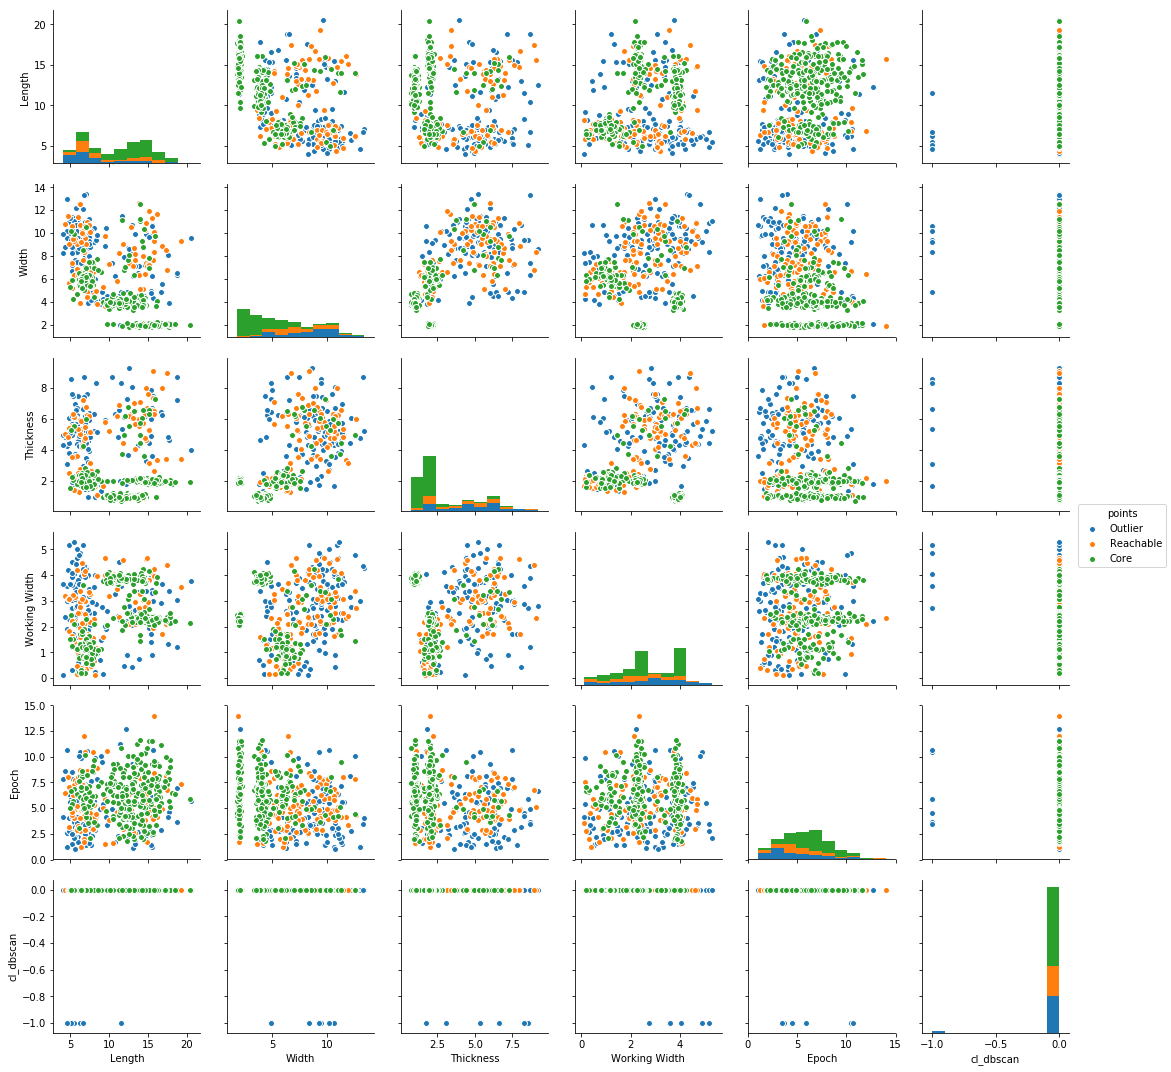

In [186]:
data['points'] = 'Reachable'
data.iloc[cl_dbscan.core_sample_indices_, 5] = 'Core'
data.loc[cl_dbscan.labels_ == -1, 'points'] = 'Outlier'
sns.pairplot(hue='points',
             data=data, 
             )
plt.show()

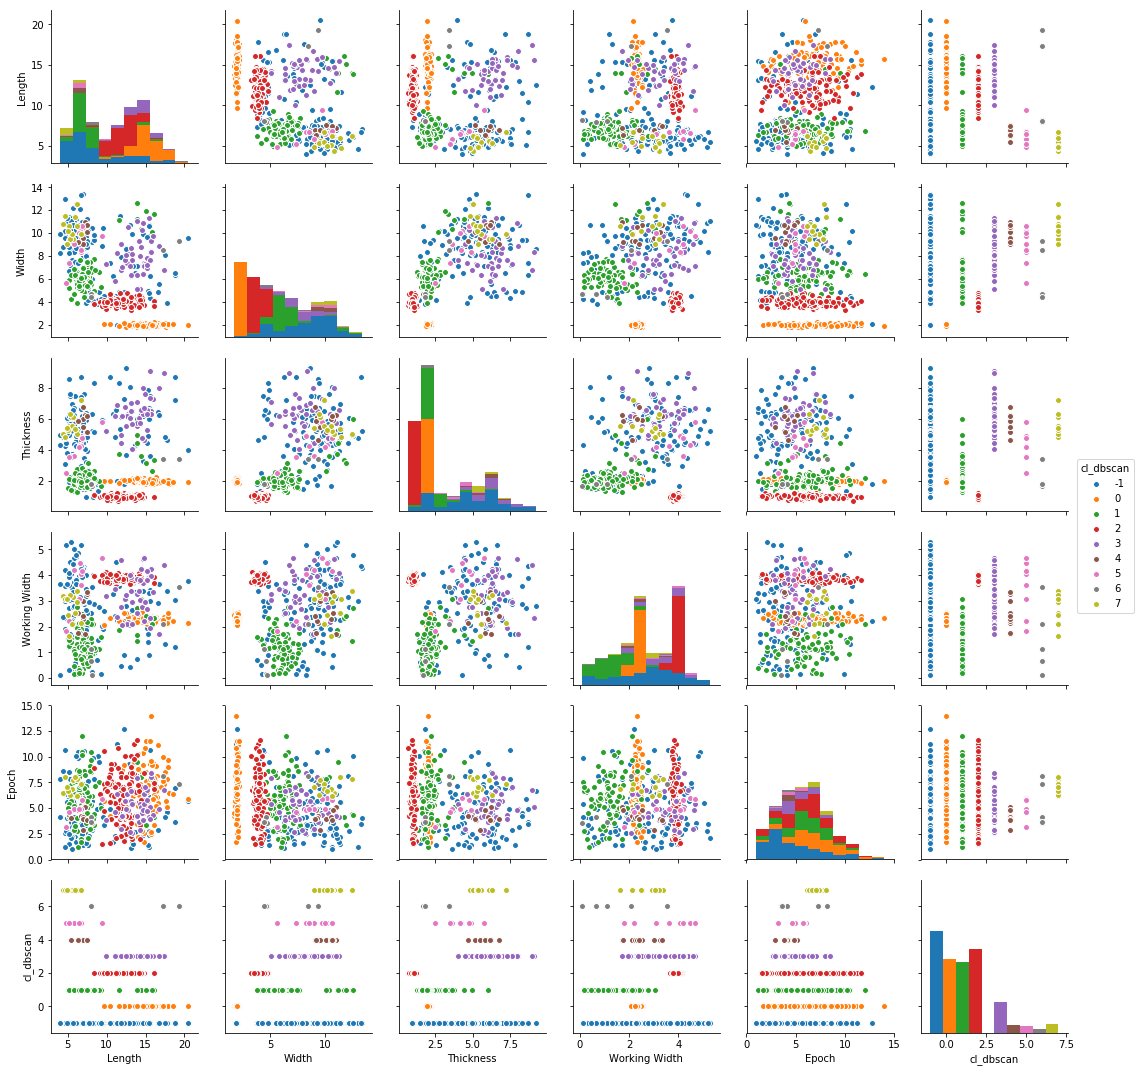

In [187]:
data['cl_dbscan'] = cl_dbscan.labels_

sns.pairplot(
             hue='cl_dbscan',
             data=data, 
             )
plt.show()

###### После нескольких попыток подобрать параметры, получилось добиться разбиения на 8 кластеров

###### Для чистоты эксперимента проверим на Canberra и тоже без эффективности метрик

In [188]:
%%time
cl_dbscan = DBSCAN(eps=0.3, min_samples=8, metric='canberra')

cl_dbscan.fit(data_normalized)

Wall time: 16.5 ms


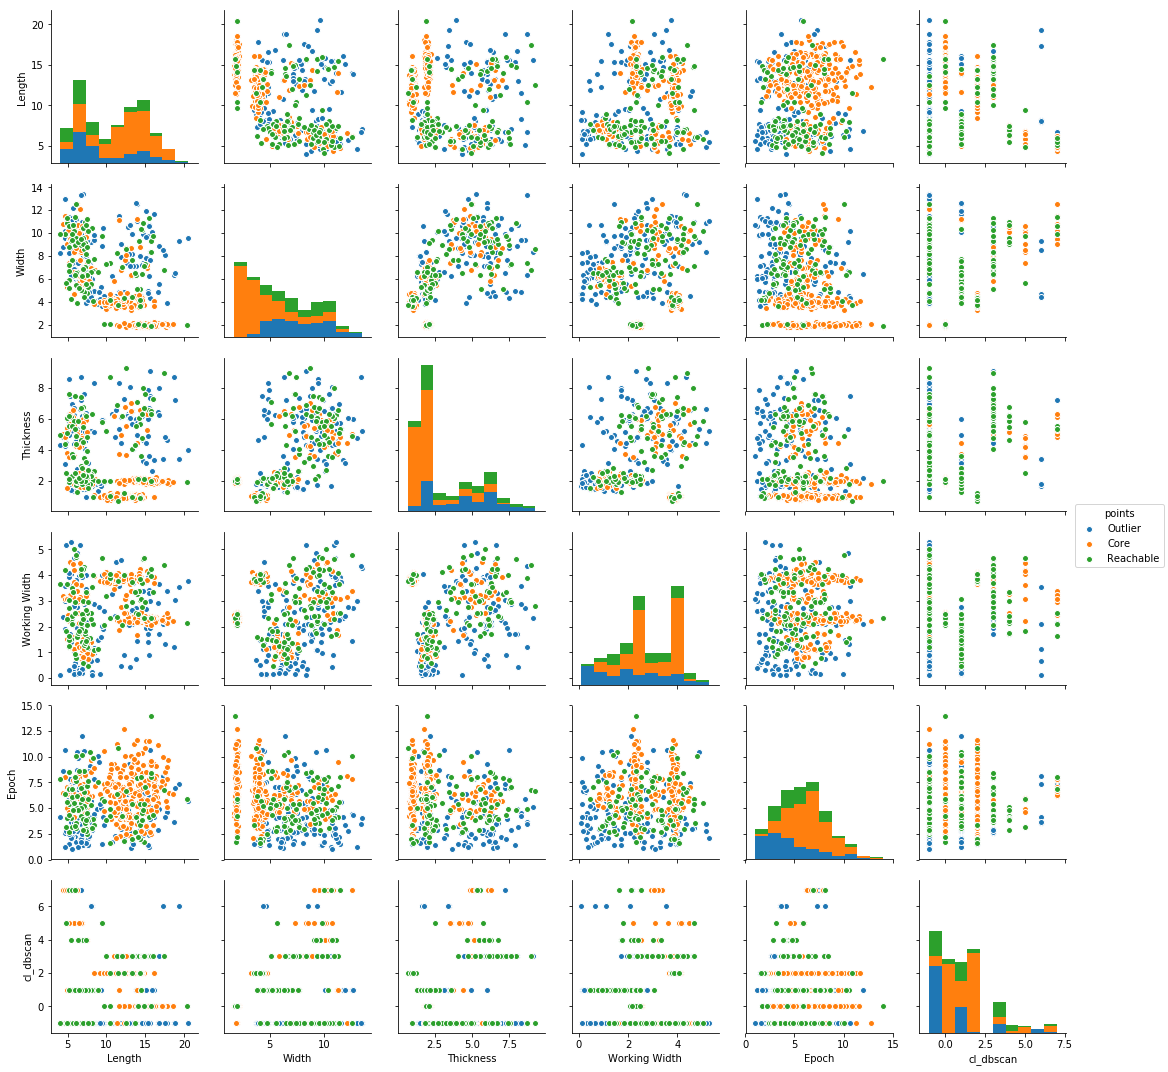

In [189]:
data['points'] = 'Reachable'
data.iloc[cl_dbscan.core_sample_indices_, 5] = 'Core'
data.loc[cl_dbscan.labels_ == -1, 'points'] = 'Outlier'
sns.pairplot(hue='points',
             data=data, 
             )
plt.show()

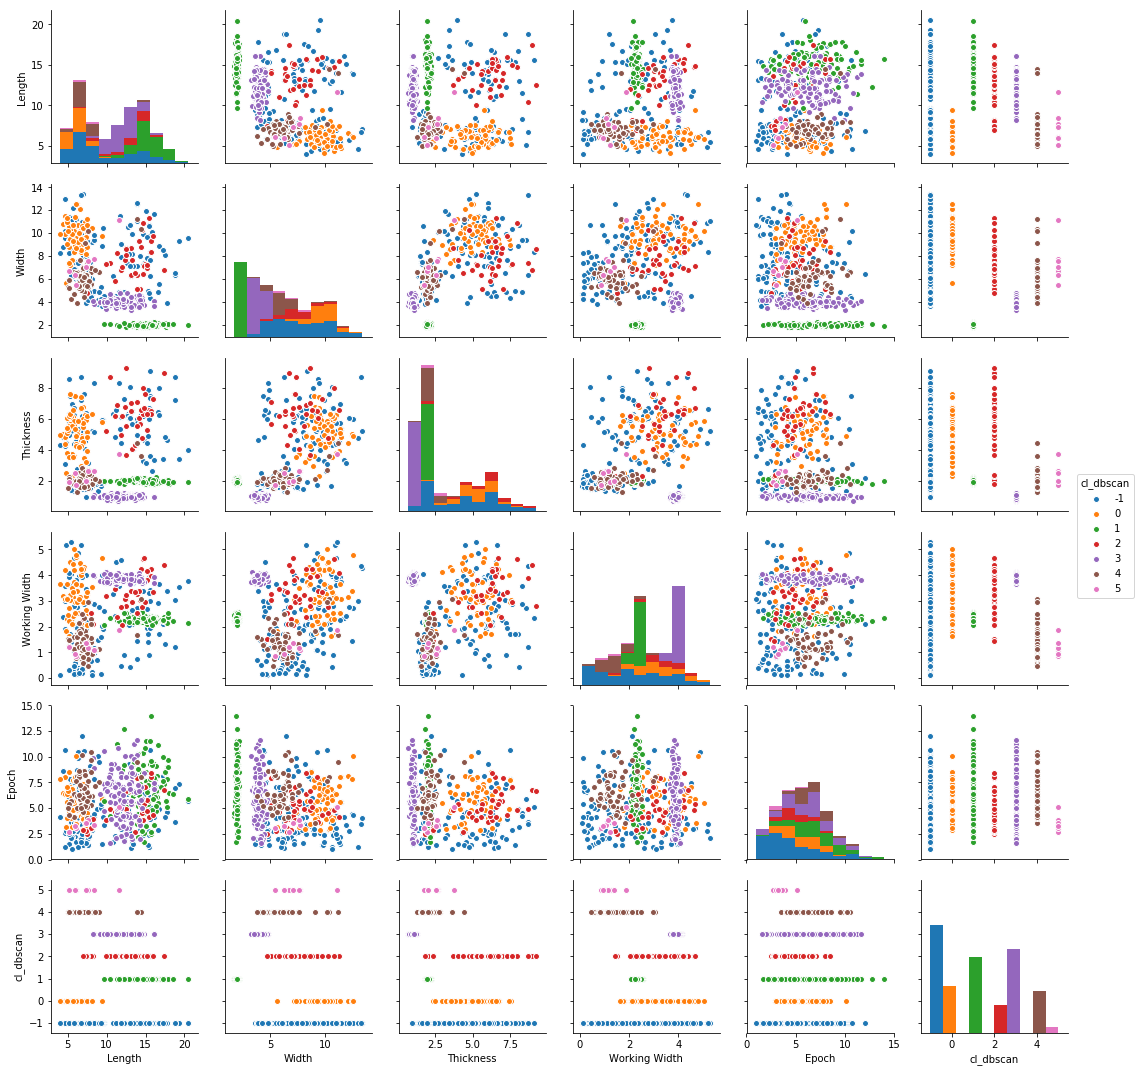

In [190]:
data['cl_dbscan'] = cl_dbscan.labels_

sns.pairplot(
             hue='cl_dbscan',
             data=data, 
             )
plt.show()

###### Как видим, определение параметров по метрикам оказалось не эффективным для DBSCAN. Проверим насколько эффективно мы подобрали коэффициенты самостоятельно

In [191]:
cl_dbscan = DBSCAN(eps=0.3, min_samples=8, metric='canberra')
cl_dbscan.fit(data_normalized)
ME = metrics.silhouette_score(data_normalized, cl_dbscan.labels_)
ME

0.14637080791572743

###### Ну, хотя бы не отрицательно...

In [193]:
data = pd.read_csv("data.csv")
cl_dbscan = DBSCAN(eps=0.3, min_samples=8, metric='canberra')
dataNorm = preprocessing.normalize(data)
cl_dbscan.fit(dataNorm)
ME = metrics.calinski_harabaz_score(dataNorm, cl_dbscan.labels_)
ME

143.45974958533208